In [1]:
import pandas as pd

data = pd.read_csv("Crimes_-_2001_to_Present.csv")

print(data.info())

print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35508 entries, 0 to 35507
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    35508 non-null  int64  
 1   Case Number           35508 non-null  object 
 2   Date                  35508 non-null  object 
 3   Block                 35508 non-null  object 
 4   IUCR                  35508 non-null  object 
 5   Primary Type          35508 non-null  object 
 6   Description           35508 non-null  object 
 7   Location Description  35193 non-null  object 
 8   Arrest                35507 non-null  object 
 9   Domestic              35507 non-null  object 
 10  Beat                  35507 non-null  float64
 11  District              35507 non-null  float64
 12  Ward                  35492 non-null  float64
 13  Community Area        35491 non-null  float64
 14  FBI Code              35507 non-null  object 
 15  X Coordinate       

<ipython-input-1-90d559421c81>:3: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("Crimes_-_2001_to_Present.csv")


In [2]:
print(data.isnull().sum())

ID                         0
Case Number                0
Date                       0
Block                      0
IUCR                       0
Primary Type               0
Description                0
Location Description     315
Arrest                     1
Domestic                   1
Beat                       1
District                   1
Ward                      16
Community Area            17
FBI Code                   1
X Coordinate            1603
Y Coordinate            1603
Year                       1
Updated On                 1
Latitude                1603
Longitude               1603
Location                1603
dtype: int64


In [3]:
data.dropna(subset=['Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
                    'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
                    'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'], inplace=True)

data['Date'] = pd.to_datetime(data['Date'])
data['Arrest'] = data['Arrest'].astype(bool)
data['Domestic'] = data['Domestic'].astype(bool)

print(data.isnull().sum())

ID                      0
Case Number             0
Date                    0
Block                   0
IUCR                    0
Primary Type            0
Description             0
Location Description    0
Arrest                  0
Domestic                0
Beat                    0
District                0
Ward                    0
Community Area          0
FBI Code                0
X Coordinate            0
Y Coordinate            0
Year                    0
Updated On              0
Latitude                0
Longitude               0
Location                0
dtype: int64


In [4]:
print(data.describe())

                 ID          Beat      District          Ward  Community Area  \
count  3.380800e+04  33808.000000  33808.000000  33808.000000    33808.000000   
mean   9.103890e+06   1174.670078     11.284459     22.803419       37.244380   
std    4.076621e+06    709.413881      7.034860     13.869987       21.614721   
min    2.084700e+04    111.000000      1.000000      1.000000        1.000000   
25%    4.338314e+06    613.000000      6.000000     10.000000       23.000000   
50%    1.204610e+07   1032.000000     10.000000     22.000000       32.000000   
75%    1.219028e+07   1731.000000     17.000000     34.000000       56.000000   
max    1.323087e+07   2535.000000     25.000000     50.000000       77.000000   

       X Coordinate  Y Coordinate          Year      Latitude     Longitude  
count  3.380800e+04  3.380800e+04  33808.000000  33808.000000  33808.000000  
mean   1.164843e+06  1.886077e+06   2014.453709     41.842988    -87.670603  
std    1.616095e+04  3.174762e+04   

In [5]:
import matplotlib.pyplot as plt

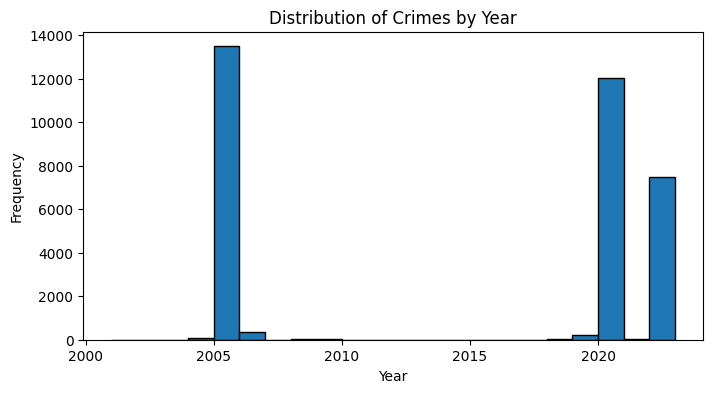

In [9]:
plt.figure(figsize=(8, 4))
plt.hist(data['Year'], bins=range(int(data['Year'].min()), int(data['Year'].max()) + 1), edgecolor='black')
plt.title('Distribution of Crimes by Year')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

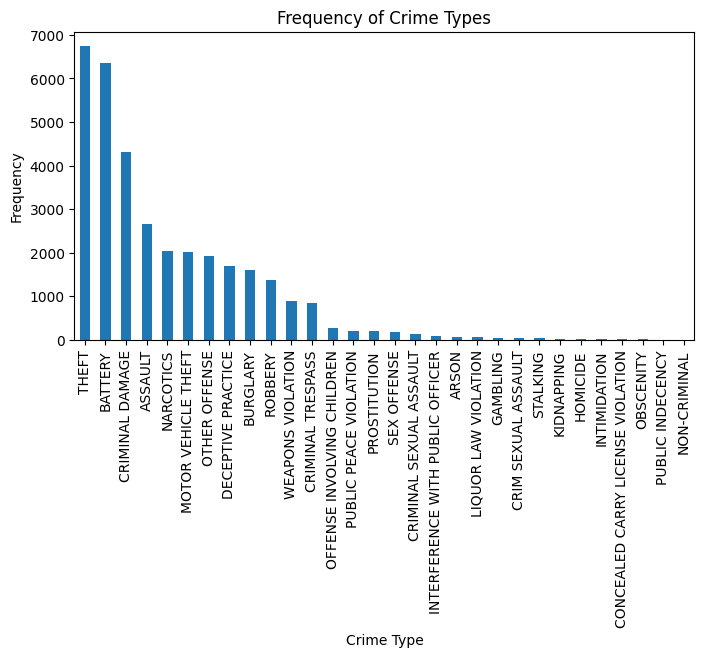

In [10]:
plt.figure(figsize=(8, 4))
data['Primary Type'].value_counts().plot(kind='bar')
plt.title('Frequency of Crime Types')
plt.xlabel('Crime Type')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

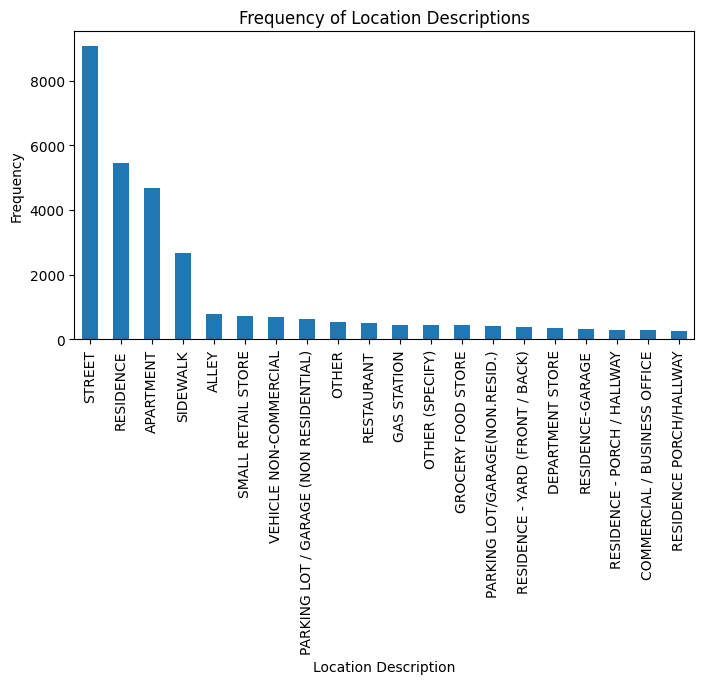

In [11]:
plt.figure(figsize=(8, 4))
data['Location Description'].value_counts().head(20).plot(kind='bar')
plt.title('Frequency of Location Descriptions')
plt.xlabel('Location Description')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()

In [16]:
!pip install pyspark

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.5.0-py2.py3-none-any.whl size=317425345 sha256=8090a06eca91aa9ca33a958bb5ee0c3e4114d5dc91aa88e4c359485abec7de61
  Stored in directory: /root/.cache/pip/wheels/41/4e/10/c2cf2467f71c678cfc8a6b9ac9241e5e44a01940da8fbb17fc
Successfully built pyspark


In [17]:
from pyspark.sql import SparkSession

In [20]:
spark = SparkSession.builder \
    .appName("Crime analysis") \
    .getOrCreate()

df = spark.read.csv("Crimes_-_2001_to_Present.csv", header=True)

df.createOrReplaceTempView("crimes")

crime_count_by_type = spark.sql("""
    SELECT `Primary Type`, COUNT(*) AS crime_count
    FROM crimes
    GROUP BY `Primary Type`
    ORDER BY crime_count DESC
""")
crime_count_by_type.show()

+--------------------+-----------+
|        Primary Type|crime_count|
+--------------------+-----------+
|               THEFT|     221672|
|             BATTERY|     196147|
|     CRIMINAL DAMAGE|     130598|
|             ASSAULT|      83445|
| MOTOR VEHICLE THEFT|      71939|
|       OTHER OFFENSE|      67091|
|  DECEPTIVE PRACTICE|      66140|
|           NARCOTICS|      64029|
|            BURGLARY|      45422|
|             ROBBERY|      41084|
|   WEAPONS VIOLATION|      28309|
|   CRIMINAL TRESPASS|      26389|
|OFFENSE INVOLVING...|       9330|
|        PROSTITUTION|       6483|
|         SEX OFFENSE|       5314|
|PUBLIC PEACE VIOL...|       4900|
|CRIMINAL SEXUAL A...|       4678|
|               ARSON|       2071|
|INTERFERENCE WITH...|       1889|
| CRIM SEXUAL ASSAULT|       1537|
+--------------------+-----------+
only showing top 20 rows

